# Install spark

In [2]:
#!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 16.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=95f1bcc125a33b55675582f56aecefc7d91e769199128937fb1b322de7ced568
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [1]:
import pyspark

# Create spark session

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
                    .appName("Python Spark Tutorial") \
                    .getOrCreate()

In [8]:
!wget -qnc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -n -q ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!sleep 5
!curl -s http://localhost:4040/api/tunnels | grep -Po 'public_url":"(?=https)\K[^"]*'
!ngrok authtoken 2OFWifpVdk7YC2a5wJeQ61ZuM3m_3ww2UMdg6TDWe29yG6v7B

https://4a6e-34-69-93-208.ngrok.io
/bin/bash: ngrok: command not found


In [4]:
spark

In [5]:
spark= SparkSession.builder.getOrCreate()

In [6]:
spark

In [7]:
from datetime import date

In [9]:
df= spark.createDataFrame([ 
    ('Red', 1, 'Apple', date(2021,1,1)),
    ('Black', 1, 'Grape', date(2021,2,1)),
    ('Yellow', 1, 'Banana', date(2021,3,1)),
], schema = "color string, sr_no long, fruit string, datet date"
)

In [10]:
df.show()

+------+-----+------+----------+
| color|sr_no| fruit|     datet|
+------+-----+------+----------+
|   Red|    1| Apple|2021-01-01|
| Black|    1| Grape|2021-02-01|
|Yellow|    1|Banana|2021-03-01|
+------+-----+------+----------+



In [13]:
df.show(1)

+-----+-----+-----+----------+
|color|sr_no|fruit|     datet|
+-----+-----+-----+----------+
|  Red|    1|Apple|2021-01-01|
+-----+-----+-----+----------+
only showing top 1 row



In [11]:
df.dtypes

[('color', 'string'),
 ('sr_no', 'bigint'),
 ('fruit', 'string'),
 ('datet', 'date')]

In [12]:
df.printSchema()

root
 |-- color: string (nullable = true)
 |-- sr_no: long (nullable = true)
 |-- fruit: string (nullable = true)
 |-- datet: date (nullable = true)



# Read csv

In [14]:
df= spark.read.csv("/content/iris.csv")
df.show()

+---+-------------+------------+-------------+------------+-----------+
|_c0|          _c1|         _c2|          _c3|         _c4|        _c5|
+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-

In [15]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [16]:
df1= spark.read.csv("/content/iris.csv", inferSchema=True,header=True)
df1.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [19]:
df1.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [17]:
df1.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



In [18]:
df1.select("SepalLengthCm").show()

+-------------+
|SepalLengthCm|
+-------------+
|          5.1|
|          4.9|
|          4.7|
|          4.6|
|          5.0|
|          5.4|
|          4.6|
|          5.0|
|          4.4|
|          4.9|
|          5.4|
|          4.8|
|          4.8|
|          4.3|
|          5.8|
|          5.7|
|          5.4|
|          5.1|
|          5.7|
|          5.1|
+-------------+
only showing top 20 rows



In [20]:
df1.select("Species").show()

+-----------+
|    Species|
+-----------+
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
|Iris-setosa|
+-----------+
only showing top 20 rows



# Read json

In [23]:
df=spark.read.json("/content/zipcodes.json")
df.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [24]:
df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- EstimatedPopulation: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Long: double (nullable = true)
 |-- Notes: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- TaxReturnsFiled: long (nullable = true)
 |-- TotalWages: long (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [26]:
df.select("City").show()

+-------------------+
|               City|
+-------------------+
|        PARC PARQUE|
|PASEO COSTA DEL SUR|
|       BDA SAN LUIS|
|  CINGULAR WIRELESS|
|         FORT WORTH|
|           FT WORTH|
|    URB EUGENE RICE|
|               MESA|
|               MESA|
|           HILLIARD|
|             HOLDER|
|               HOLT|
|          HOMOSASSA|
|       BDA SAN LUIS|
|      SECT LANAUSSE|
|      SPRING GARDEN|
|        SPRINGVILLE|
|        SPRUCE PINE|
|           ASH HILL|
|           ASHEBORO|
+-------------------+
only showing top 20 rows



In [27]:
df.select("City","Country").show()

+-------------------+-------+
|               City|Country|
+-------------------+-------+
|        PARC PARQUE|     US|
|PASEO COSTA DEL SUR|     US|
|       BDA SAN LUIS|     US|
|  CINGULAR WIRELESS|     US|
|         FORT WORTH|     US|
|           FT WORTH|     US|
|    URB EUGENE RICE|     US|
|               MESA|     US|
|               MESA|     US|
|           HILLIARD|     US|
|             HOLDER|     US|
|               HOLT|     US|
|          HOMOSASSA|     US|
|       BDA SAN LUIS|     US|
|      SECT LANAUSSE|     US|
|      SPRING GARDEN|     US|
|        SPRINGVILLE|     US|
|        SPRUCE PINE|     US|
|           ASH HILL|     US|
|           ASHEBORO|     US|
+-------------------+-------+
only showing top 20 rows



In [25]:
df.columns


['City',
 'Country',
 'Decommisioned',
 'EstimatedPopulation',
 'Lat',
 'Location',
 'LocationText',
 'LocationType',
 'Long',
 'Notes',
 'RecordNumber',
 'State',
 'TaxReturnsFiled',
 'TotalWages',
 'WorldRegion',
 'Xaxis',
 'Yaxis',
 'Zaxis',
 'ZipCodeType',
 'Zipcode']

# createOrReplace TempView

In [28]:
df=spark.read.json("/content/zipcodes.json")
df.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [74]:
#incorrect format use tempview
#spark.sql('select * from df')

In [30]:
df.createOrReplaceTempView("df")

In [31]:
spark.sql('select * from df')

DataFrame[City: string, Country: string, Decommisioned: boolean, EstimatedPopulation: bigint, Lat: double, Location: string, LocationText: string, LocationType: string, Long: double, Notes: string, RecordNumber: bigint, State: string, TaxReturnsFiled: bigint, TotalWages: bigint, WorldRegion: string, Xaxis: double, Yaxis: double, Zaxis: double, ZipCodeType: string, Zipcode: bigint]

In [32]:
spark.sql('select * from df').show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [49]:
type(spark.sql('select * from df'))

pyspark.sql.dataframe.DataFrame

In [48]:
sqldf= spark.sql('select * from df')
sqldf

DataFrame[City: string, Country: string, Decommisioned: boolean, EstimatedPopulation: bigint, Lat: double, Location: string, LocationText: string, LocationType: string, Long: double, Notes: string, RecordNumber: bigint, State: string, TaxReturnsFiled: bigint, TotalWages: bigint, WorldRegion: string, Xaxis: double, Yaxis: double, Zaxis: double, ZipCodeType: string, Zipcode: bigint]

In [34]:
sqldf.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

# create Global TempView

In [39]:
df1=spark.read.json("/content/zipcodes.json")
df1.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [40]:
df1.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [41]:
#spark.sql("select * from df1")

AnalysisException: ignored

In [42]:
df.createGlobalTempView("df1")

In [47]:
type(spark.sql("select * from global_temp.df1"))

pyspark.sql.dataframe.DataFrame

In [45]:
spark.sql("select * from global_temp.df1")

DataFrame[City: string, Country: string, Decommisioned: boolean, EstimatedPopulation: bigint, Lat: double, Location: string, LocationText: string, LocationType: string, Long: double, Notes: string, RecordNumber: bigint, State: string, TaxReturnsFiled: bigint, TotalWages: bigint, WorldRegion: string, Xaxis: double, Yaxis: double, Zaxis: double, ZipCodeType: string, Zipcode: bigint]

In [46]:
spark.sql("select * from global_temp.df1").show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

# **Read Text File**

In [53]:
df= spark.read.option("header","true") \
    .option("delimiter",",") \
    .option("inferSchema" , "true") \
    .csv("iris.txt")

In [54]:
df.show()

+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
+---+---+---+---+-----------+
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
|5.4|3.4|1.7|0.2|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



In [56]:
df= spark.read.option("header","false") \
    .option("delimiter",",") \
    .option("inferSchema" , "true") \
    .csv("iris.txt")
df.show()

+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



In [58]:
df= spark.read.option("header","true") \
    .option("delimiter",",") \
    .option("inferSchema" , "true") \
    .csv("iris1.txt")
df.show()

+---+---+---+---+-----------+
|  a|  b|  c|  d|          e|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



In [59]:
df.printSchema()

root
 |-- a: double (nullable = true)
 |-- b: double (nullable = true)
 |-- c: double (nullable = true)
 |-- d: double (nullable = true)
 |-- e: string (nullable = true)



In [60]:
df.columns

['a', 'b', 'c', 'd', 'e']

In [62]:
df.select('a').show()

+---+
|  a|
+---+
|5.1|
|4.9|
|4.7|
|4.6|
|5.0|
|5.4|
|4.6|
|5.0|
|4.4|
|4.9|
|5.4|
|4.8|
|4.8|
|4.3|
|5.8|
|5.7|
|5.4|
|5.1|
|5.7|
|5.1|
+---+
only showing top 20 rows



In [61]:
df.select('a','e').show()

+---+-----------+
|  a|          e|
+---+-----------+
|5.1|Iris-setosa|
|4.9|Iris-setosa|
|4.7|Iris-setosa|
|4.6|Iris-setosa|
|5.0|Iris-setosa|
|5.4|Iris-setosa|
|4.6|Iris-setosa|
|5.0|Iris-setosa|
|4.4|Iris-setosa|
|4.9|Iris-setosa|
|5.4|Iris-setosa|
|4.8|Iris-setosa|
|4.8|Iris-setosa|
|4.3|Iris-setosa|
|5.8|Iris-setosa|
|5.7|Iris-setosa|
|5.4|Iris-setosa|
|5.1|Iris-setosa|
|5.7|Iris-setosa|
|5.1|Iris-setosa|
+---+-----------+
only showing top 20 rows



# **Create parquet file from json**

In [63]:
df=spark.read.json("zipcodes.json")
df.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

In [64]:
df.write.parquet("df.parquet")

In [65]:
df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- EstimatedPopulation: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Long: double (nullable = true)
 |-- Notes: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- TaxReturnsFiled: long (nullable = true)
 |-- TotalWages: long (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)



# Reading parquet file

In [67]:
df_p =spark.read.parquet("df.parquet")
df_p.printSchema()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- EstimatedPopulation: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Long: double (nullable = true)
 |-- Notes: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- TaxReturnsFiled: long (nullable = true)
 |-- TotalWages: long (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [70]:
df_p.select('City','Zipcode').show()

+-------------------+-------+
|               City|Zipcode|
+-------------------+-------+
|        PARC PARQUE|    704|
|PASEO COSTA DEL SUR|    704|
|       BDA SAN LUIS|    709|
|  CINGULAR WIRELESS|  76166|
|         FORT WORTH|  76177|
|           FT WORTH|  76177|
|    URB EUGENE RICE|    704|
|               MESA|  85209|
|               MESA|  85210|
|           HILLIARD|  32046|
|             HOLDER|  34445|
|               HOLT|  32564|
|          HOMOSASSA|  34487|
|       BDA SAN LUIS|    708|
|      SECT LANAUSSE|    704|
|      SPRING GARDEN|  36275|
|        SPRINGVILLE|  35146|
|        SPRUCE PINE|  35585|
|           ASH HILL|  27007|
|           ASHEBORO|  27203|
+-------------------+-------+
only showing top 20 rows



In [71]:
df_p.select('City').show()

+-------------------+
|               City|
+-------------------+
|        PARC PARQUE|
|PASEO COSTA DEL SUR|
|       BDA SAN LUIS|
|  CINGULAR WIRELESS|
|         FORT WORTH|
|           FT WORTH|
|    URB EUGENE RICE|
|               MESA|
|               MESA|
|           HILLIARD|
|             HOLDER|
|               HOLT|
|          HOMOSASSA|
|       BDA SAN LUIS|
|      SECT LANAUSSE|
|      SPRING GARDEN|
|        SPRINGVILLE|
|        SPRUCE PINE|
|           ASH HILL|
|           ASHEBORO|
+-------------------+
only showing top 20 rows



In [72]:
df_p.show()

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|               City|Country|Decommisioned|EstimatedPopulation|  Lat|            Location|        LocationText|  LocationType|   Long|        Notes|RecordNumber|State|TaxReturnsFiled|TotalWages|WorldRegion|Xaxis|Yaxis|Zaxis|ZipCodeType|Zipcode|
+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+----------+-----------+-----+-----+-----+-----------+-------+
|        PARC PARQUE|     US|        false|               null|17.96|NA-US-PR-PARC PARQUE|     Parc Parque, PR|NOT ACCEPTABLE| -66.22|         null|           1|   PR|           null|      null|         NA| 0.38|-0.87|  0.3|   STANDARD|    704|
|PASEO COSTA DEL SUR

# Write to csv

In [75]:
df= spark.read.csv("/content/iris.csv",inferSchema=True,header=True)
df.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [76]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



In [77]:
#writes csv to folder iris_flower
df.write.csv("iris_flower",header=True)

# Read file from url, file location etc using SparkFiles

from pyspark import SparkFiles

In [80]:
from pyspark import SparkFiles

In [81]:
url = 'https://raw.githubusercontent.com/siddiquiamir/Data/master/iris.csv'
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("iris.csv"),inferSchema=True, header=True)

In [82]:
df.show(3)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 3 rows



In [83]:
df.count()

150

In [84]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [87]:
df.select("sepal_length").show(3)

+------------+
|sepal_length|
+------------+
|         5.1|
|         4.9|
|         4.7|
+------------+
only showing top 3 rows



In [88]:
df.select("species", "Sepal_Length").show(3)

+-------+------------+
|species|Sepal_Length|
+-------+------------+
| setosa|         5.1|
| setosa|         4.9|
| setosa|         4.7|
+-------+------------+
only showing top 3 rows



In [89]:
df.species.alias("target")

Column<'species AS target'>

In [90]:
df.show(2)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 2 rows



In [91]:
df.species.alias("target").show(2)

TypeError: ignored

In [92]:
df.select(df.species.alias("target")).show(5)

+------+
|target|
+------+
|setosa|
|setosa|
|setosa|
|setosa|
|setosa|
+------+
only showing top 5 rows



In [95]:
df.select('sepal_length', (df.species.alias("target"))).show(5)

+------------+------+
|sepal_length|target|
+------------+------+
|         5.1|setosa|
|         4.9|setosa|
|         4.7|setosa|
|         4.6|setosa|
|         5.0|setosa|
+------------+------+
only showing top 5 rows



In [97]:
df.select(*, (df.species.alias("target"))).show(5)

SyntaxError: ignored

In [98]:
df.select('*', (df.species.alias("target"))).show(5)

+------------+-----------+------------+-----------+-------+------+
|sepal_length|sepal_width|petal_length|petal_width|species|target|
+------------+-----------+------------+-----------+-------+------+
|         5.1|        3.5|         1.4|        0.2| setosa|setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|setosa|
+------------+-----------+------------+-----------+-------+------+
only showing top 5 rows



In [100]:
url = 'https://raw.githubusercontent.com/siddiquiamir/Data/master/autompg.csv'
spark.sparkContext.addFile(url)
df1 = spark.read.csv(SparkFiles.get("autompg.csv"),inferSchema=True, header=True)

In [101]:
df1.show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
|15.0|        8|       429.0|       198|  4341|        10.0|        70|     1|    ford galaxie 500|
|14.0|        8|       454.0|       220|  4354|         9.0|        70|     1|    chevrolet impala|


In [103]:
df1.printSchema()

root
 |-- mpg: double (nullable = true)
 |-- cylinders: integer (nullable = true)
 |-- displacement: double (nullable = true)
 |-- horsepower: string (nullable = true)
 |-- weight: integer (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- model year: integer (nullable = true)
 |-- origin: integer (nullable = true)
 |-- car name: string (nullable = true)



# dataframe operations

In [104]:
url = 'https://raw.githubusercontent.com/spark-examples/pyspark-examples/master/resources/simple-zipcodes.csv'
spark.sparkContext.addFile(url)
df1 = spark.read.csv(SparkFiles.get("simple-zipcodes.csv"),inferSchema=True, header=True)

In [105]:
df1.show()

+------------+-------+-------------------+-------+-----+
|RecordNumber|Country|               City|Zipcode|State|
+------------+-------+-------------------+-------+-----+
|           1|     US|        PARC PARQUE|    704|   PR|
|           2|     US|PASEO COSTA DEL SUR|    704|   PR|
|          10|     US|       BDA SAN LUIS|    709|   PR|
|       49347|     US|               HOLT|  32564|   FL|
|       49348|     US|          HOMOSASSA|  34487|   FL|
|       61391|     US|  CINGULAR WIRELESS|  76166|   TX|
|       61392|     US|         FORT WORTH|  76177|   TX|
|       61393|     US|           FT WORTH|  76177|   TX|
|       54356|     US|        SPRUCE PINE|  35585|   AL|
|       76511|     US|           ASH HILL|  27007|   NC|
|           4|     US|    URB EUGENE RICE|    704|   PR|
|       39827|     US|               MESA|  85209|   AZ|
|       39828|     US|               MESA|  85210|   AZ|
|       49345|     US|           HILLIARD|  32046|   FL|
|       49346|     US|         

In [107]:
df1.printSchema()

root
 |-- RecordNumber: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Zipcode: integer (nullable = true)
 |-- State: string (nullable = true)



In [108]:
df1.write.json('simple-zipcodes')

In [109]:
df= spark.read.json('/content/simple-zipcodes/simple-zipcodes.json')
df.show()

+-------------------+-------+------------+-----+-------+
|               City|Country|RecordNumber|State|Zipcode|
+-------------------+-------+------------+-----+-------+
|        PARC PARQUE|     US|           1|   PR|    704|
|PASEO COSTA DEL SUR|     US|           2|   PR|    704|
|       BDA SAN LUIS|     US|          10|   PR|    709|
|               HOLT|     US|       49347|   FL|  32564|
|          HOMOSASSA|     US|       49348|   FL|  34487|
|  CINGULAR WIRELESS|     US|       61391|   TX|  76166|
|         FORT WORTH|     US|       61392|   TX|  76177|
|           FT WORTH|     US|       61393|   TX|  76177|
|        SPRUCE PINE|     US|       54356|   AL|  35585|
|           ASH HILL|     US|       76511|   NC|  27007|
|    URB EUGENE RICE|     US|           4|   PR|    704|
|               MESA|     US|       39827|   AZ|  85209|
|               MESA|     US|       39828|   AZ|  85210|
|           HILLIARD|     US|       49345|   FL|  32046|
|             HOLDER|     US|  

In [110]:
df.printSchema()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [111]:
df.collect()

[Row(City='PARC PARQUE', Country='US', RecordNumber=1, State='PR', Zipcode=704),
 Row(City='PASEO COSTA DEL SUR', Country='US', RecordNumber=2, State='PR', Zipcode=704),
 Row(City='BDA SAN LUIS', Country='US', RecordNumber=10, State='PR', Zipcode=709),
 Row(City='HOLT', Country='US', RecordNumber=49347, State='FL', Zipcode=32564),
 Row(City='HOMOSASSA', Country='US', RecordNumber=49348, State='FL', Zipcode=34487),
 Row(City='CINGULAR WIRELESS', Country='US', RecordNumber=61391, State='TX', Zipcode=76166),
 Row(City='FORT WORTH', Country='US', RecordNumber=61392, State='TX', Zipcode=76177),
 Row(City='FT WORTH', Country='US', RecordNumber=61393, State='TX', Zipcode=76177),
 Row(City='SPRUCE PINE', Country='US', RecordNumber=54356, State='AL', Zipcode=35585),
 Row(City='ASH HILL', Country='US', RecordNumber=76511, State='NC', Zipcode=27007),
 Row(City='URB EUGENE RICE', Country='US', RecordNumber=4, State='PR', Zipcode=704),
 Row(City='MESA', Country='US', RecordNumber=39827, State='AZ',

In [112]:
df.show(5)

+-------------------+-------+------------+-----+-------+
|               City|Country|RecordNumber|State|Zipcode|
+-------------------+-------+------------+-----+-------+
|        PARC PARQUE|     US|           1|   PR|    704|
|PASEO COSTA DEL SUR|     US|           2|   PR|    704|
|       BDA SAN LUIS|     US|          10|   PR|    709|
|               HOLT|     US|       49347|   FL|  32564|
|          HOMOSASSA|     US|       49348|   FL|  34487|
+-------------------+-------+------------+-----+-------+
only showing top 5 rows



In [113]:
df.take(5)

[Row(City='PARC PARQUE', Country='US', RecordNumber=1, State='PR', Zipcode=704),
 Row(City='PASEO COSTA DEL SUR', Country='US', RecordNumber=2, State='PR', Zipcode=704),
 Row(City='BDA SAN LUIS', Country='US', RecordNumber=10, State='PR', Zipcode=709),
 Row(City='HOLT', Country='US', RecordNumber=49347, State='FL', Zipcode=32564),
 Row(City='HOMOSASSA', Country='US', RecordNumber=49348, State='FL', Zipcode=34487)]

In [114]:
df.count()

20

In [116]:
df.select('City').count()

20

In [117]:
df.select('City','Country').count()

20

In [118]:
df.select('City').show()

+-------------------+
|               City|
+-------------------+
|        PARC PARQUE|
|PASEO COSTA DEL SUR|
|       BDA SAN LUIS|
|               HOLT|
|          HOMOSASSA|
|  CINGULAR WIRELESS|
|         FORT WORTH|
|           FT WORTH|
|        SPRUCE PINE|
|           ASH HILL|
|    URB EUGENE RICE|
|               MESA|
|               MESA|
|           HILLIARD|
|             HOLDER|
|      SECT LANAUSSE|
|      SPRING GARDEN|
|        SPRINGVILLE|
|           ASHEBORO|
|           ASHEBORO|
+-------------------+



In [119]:
df.select('City','Country').show()

+-------------------+-------+
|               City|Country|
+-------------------+-------+
|        PARC PARQUE|     US|
|PASEO COSTA DEL SUR|     US|
|       BDA SAN LUIS|     US|
|               HOLT|     US|
|          HOMOSASSA|     US|
|  CINGULAR WIRELESS|     US|
|         FORT WORTH|     US|
|           FT WORTH|     US|
|        SPRUCE PINE|     US|
|           ASH HILL|     US|
|    URB EUGENE RICE|     US|
|               MESA|     US|
|               MESA|     US|
|           HILLIARD|     US|
|             HOLDER|     US|
|      SECT LANAUSSE|     US|
|      SPRING GARDEN|     US|
|        SPRINGVILLE|     US|
|           ASHEBORO|     US|
|           ASHEBORO|     US|
+-------------------+-------+



In [120]:
df["Zipcode"]>704

Column<'(Zipcode > 704)'>

In [121]:
(df["Zipcode"]>704).show()

TypeError: ignored

In [123]:
df.select((df["Zipcode"]>704)).show()

+---------------+
|(Zipcode > 704)|
+---------------+
|          false|
|          false|
|           true|
|           true|
|           true|
|           true|
|           true|
|           true|
|           true|
|           true|
|          false|
|           true|
|           true|
|           true|
|           true|
|          false|
|           true|
|           true|
|           true|
|           true|
+---------------+



In [124]:
df.filter((df["Zipcode"]>704)).show()

+-----------------+-------+------------+-----+-------+
|             City|Country|RecordNumber|State|Zipcode|
+-----------------+-------+------------+-----+-------+
|     BDA SAN LUIS|     US|          10|   PR|    709|
|             HOLT|     US|       49347|   FL|  32564|
|        HOMOSASSA|     US|       49348|   FL|  34487|
|CINGULAR WIRELESS|     US|       61391|   TX|  76166|
|       FORT WORTH|     US|       61392|   TX|  76177|
|         FT WORTH|     US|       61393|   TX|  76177|
|      SPRUCE PINE|     US|       54356|   AL|  35585|
|         ASH HILL|     US|       76511|   NC|  27007|
|             MESA|     US|       39827|   AZ|  85209|
|             MESA|     US|       39828|   AZ|  85210|
|         HILLIARD|     US|       49345|   FL|  32046|
|           HOLDER|     US|       49346|   FL|  34445|
|    SPRING GARDEN|     US|       54354|   AL|  36275|
|      SPRINGVILLE|     US|       54355|   AL|  35146|
|         ASHEBORO|     US|       76512|   NC|  27203|
|         

In [126]:
df.select('Zipcode').filter(df['Zipcode']==704).show()

+-------+
|Zipcode|
+-------+
|    704|
|    704|
|    704|
|    704|
+-------+



In [127]:
df.select('City').filter("City like 'M%'").show()

+----+
|City|
+----+
|MESA|
|MESA|
+----+



In [128]:
df.sort("State").show()

+-------------------+-------+------------+-----+-------+
|               City|Country|RecordNumber|State|Zipcode|
+-------------------+-------+------------+-----+-------+
|        SPRINGVILLE|     US|       54355|   AL|  35146|
|      SPRING GARDEN|     US|       54354|   AL|  36275|
|        SPRUCE PINE|     US|       54356|   AL|  35585|
|               MESA|     US|       39827|   AZ|  85209|
|               MESA|     US|       39828|   AZ|  85210|
|               HOLT|     US|       49347|   FL|  32564|
|           HILLIARD|     US|       49345|   FL|  32046|
|          HOMOSASSA|     US|       49348|   FL|  34487|
|             HOLDER|     US|       49346|   FL|  34445|
|           ASHEBORO|     US|       76513|   NC|  27204|
|           ASHEBORO|     US|       76512|   NC|  27203|
|           ASH HILL|     US|       76511|   NC|  27007|
|PASEO COSTA DEL SUR|     US|           2|   PR|    704|
|        PARC PARQUE|     US|           1|   PR|    704|
|       BDA SAN LUIS|     US|  

In [129]:
df.describe().show()

+-------+---------------+-------+-----------------+-----+------------------+
|summary|           City|Country|     RecordNumber|State|           Zipcode|
+-------+---------------+-------+-----------------+-----+------------------+
|  count|             20|     20|               20|   20|                20|
|   mean|           null|   null|          42691.9| null|           36221.3|
| stddev|           null|   null|27331.67710089099| null|29182.998937016306|
|    min|       ASH HILL|     US|                1|   AL|               704|
|    max|URB EUGENE RICE|     US|            76513|   TX|             85210|
+-------+---------------+-------+-----------------+-----+------------------+



In [130]:
df.describe('Zipcode').show()

+-------+------------------+
|summary|           Zipcode|
+-------+------------------+
|  count|                20|
|   mean|           36221.3|
| stddev|29182.998937016306|
|    min|               704|
|    max|             85210|
+-------+------------------+



In [131]:
type(df.describe('Zipcode'))

pyspark.sql.dataframe.DataFrame

In [132]:
df_des =df.describe('Zipcode')
df_des.show()

+-------+------------------+
|summary|           Zipcode|
+-------+------------------+
|  count|                20|
|   mean|           36221.3|
| stddev|29182.998937016306|
|    min|               704|
|    max|             85210|
+-------+------------------+



In [134]:
df_des.summary()

DataFrame[summary: string, summary: string, Zipcode: string]

In [135]:
df.describe('Zipcode')

DataFrame[summary: string, Zipcode: string]

In [137]:
df.collect()

[Row(City='PARC PARQUE', Country='US', RecordNumber=1, State='PR', Zipcode=704),
 Row(City='PASEO COSTA DEL SUR', Country='US', RecordNumber=2, State='PR', Zipcode=704),
 Row(City='BDA SAN LUIS', Country='US', RecordNumber=10, State='PR', Zipcode=709),
 Row(City='HOLT', Country='US', RecordNumber=49347, State='FL', Zipcode=32564),
 Row(City='HOMOSASSA', Country='US', RecordNumber=49348, State='FL', Zipcode=34487),
 Row(City='CINGULAR WIRELESS', Country='US', RecordNumber=61391, State='TX', Zipcode=76166),
 Row(City='FORT WORTH', Country='US', RecordNumber=61392, State='TX', Zipcode=76177),
 Row(City='FT WORTH', Country='US', RecordNumber=61393, State='TX', Zipcode=76177),
 Row(City='SPRUCE PINE', Country='US', RecordNumber=54356, State='AL', Zipcode=35585),
 Row(City='ASH HILL', Country='US', RecordNumber=76511, State='NC', Zipcode=27007),
 Row(City='URB EUGENE RICE', Country='US', RecordNumber=4, State='PR', Zipcode=704),
 Row(City='MESA', Country='US', RecordNumber=39827, State='AZ',

# sql queries

In [142]:
df_sql= spark.read.json("/content/simple-zipcodes/simple-zipcodes.json")
df_sql.show()

+-------------------+-------+------------+-----+-------+
|               City|Country|RecordNumber|State|Zipcode|
+-------------------+-------+------------+-----+-------+
|        PARC PARQUE|     US|           1|   PR|    704|
|PASEO COSTA DEL SUR|     US|           2|   PR|    704|
|       BDA SAN LUIS|     US|          10|   PR|    709|
|               HOLT|     US|       49347|   FL|  32564|
|          HOMOSASSA|     US|       49348|   FL|  34487|
|  CINGULAR WIRELESS|     US|       61391|   TX|  76166|
|         FORT WORTH|     US|       61392|   TX|  76177|
|           FT WORTH|     US|       61393|   TX|  76177|
|        SPRUCE PINE|     US|       54356|   AL|  35585|
|           ASH HILL|     US|       76511|   NC|  27007|
|    URB EUGENE RICE|     US|           4|   PR|    704|
|               MESA|     US|       39827|   AZ|  85209|
|               MESA|     US|       39828|   AZ|  85210|
|           HILLIARD|     US|       49345|   FL|  32046|
|             HOLDER|     US|  

In [147]:
df_sql.printSchema()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [150]:
df_sql.createOrReplaceTempView("df_sql")

In [151]:
spark.sql("select * from df_sql").show()

+-------------------+-------+------------+-----+-------+
|               City|Country|RecordNumber|State|Zipcode|
+-------------------+-------+------------+-----+-------+
|        PARC PARQUE|     US|           1|   PR|    704|
|PASEO COSTA DEL SUR|     US|           2|   PR|    704|
|       BDA SAN LUIS|     US|          10|   PR|    709|
|               HOLT|     US|       49347|   FL|  32564|
|          HOMOSASSA|     US|       49348|   FL|  34487|
|  CINGULAR WIRELESS|     US|       61391|   TX|  76166|
|         FORT WORTH|     US|       61392|   TX|  76177|
|           FT WORTH|     US|       61393|   TX|  76177|
|        SPRUCE PINE|     US|       54356|   AL|  35585|
|           ASH HILL|     US|       76511|   NC|  27007|
|    URB EUGENE RICE|     US|           4|   PR|    704|
|               MESA|     US|       39827|   AZ|  85209|
|               MESA|     US|       39828|   AZ|  85210|
|           HILLIARD|     US|       49345|   FL|  32046|
|             HOLDER|     US|  

In [152]:
spark.sql("select count(City) from df_sql")

DataFrame[count(City): bigint]

In [153]:
spark.sql("select count(City) from df_sql").show()

+-----------+
|count(City)|
+-----------+
|         20|
+-----------+



In [154]:
query= "select City,State from df_sql"
spark.sql(query).show()

+-------------------+-----+
|               City|State|
+-------------------+-----+
|        PARC PARQUE|   PR|
|PASEO COSTA DEL SUR|   PR|
|       BDA SAN LUIS|   PR|
|               HOLT|   FL|
|          HOMOSASSA|   FL|
|  CINGULAR WIRELESS|   TX|
|         FORT WORTH|   TX|
|           FT WORTH|   TX|
|        SPRUCE PINE|   AL|
|           ASH HILL|   NC|
|    URB EUGENE RICE|   PR|
|               MESA|   AZ|
|               MESA|   AZ|
|           HILLIARD|   FL|
|             HOLDER|   FL|
|      SECT LANAUSSE|   PR|
|      SPRING GARDEN|   AL|
|        SPRINGVILLE|   AL|
|           ASHEBORO|   NC|
|           ASHEBORO|   NC|
+-------------------+-----+



In [155]:
query= "select City,State from df_sql where Zipcode ==704"
spark.sql(query).show()


+-------------------+-----+
|               City|State|
+-------------------+-----+
|        PARC PARQUE|   PR|
|PASEO COSTA DEL SUR|   PR|
|    URB EUGENE RICE|   PR|
|      SECT LANAUSSE|   PR|
+-------------------+-----+



In [158]:
type(spark.sql(query))

pyspark.sql.dataframe.DataFrame

In [160]:
query= "select City,State from df_sql where Zipcode ==704"
df_704 = spark.sql(query)
df_704.show()


+-------------------+-----+
|               City|State|
+-------------------+-----+
|        PARC PARQUE|   PR|
|PASEO COSTA DEL SUR|   PR|
|    URB EUGENE RICE|   PR|
|      SECT LANAUSSE|   PR|
+-------------------+-----+



# window_function

In [186]:
url = 'https://raw.githubusercontent.com/siddiquiamir/PySpark-Tutorial/main/emp_data.csv'
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("emp_data.csv"),inferSchema=True, header=True)

In [187]:
df.show(3)

+----+--------+--------+
|year|    dept|  salary|
+----+--------+--------+
|2004|      IT|    2004|
|2004|      IT|62022432|
|2004|Accounts| 4409580|
+----+--------+--------+
only showing top 3 rows



In [188]:
df.count()

119

In [189]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: integer (nullable = true)



In [190]:
import pyspark.sql.functions as F
from pyspark.sql import Window


In [192]:
df.show(3)

+----+--------+--------+
|year|    dept|  salary|
+----+--------+--------+
|2004|      IT|    2004|
|2004|      IT|62022432|
|2004|Accounts| 4409580|
+----+--------+--------+
only showing top 3 rows



In [197]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: integer (nullable = true)



In [ ]:
windowSpec1  = Window.partitionBy("dept")

In [204]:
data = df.withColumn("list_salary",F.collect_list(F.col("salary")).over(windowSpec1)) \
      .withColumn("average_salary",F.avg(F.col('salary')).over(windowSpec1)) \
      .withColumn("total_salary",F.sum(F.col('salary')).over(windowSpec1))
data.show(100)

+----+--------+---------+--------------------+-------------------+------------+
|year|    dept|   salary|         list_salary|     average_salary|total_salary|
+----+--------+---------+--------------------+-------------------+------------+
|2004|Accounts|  4409580|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2004|Accounts|     3645|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2005|Accounts|  4239440|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2005|Accounts|     3101|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2006|Accounts|  4259693|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2006|Accounts|     3642|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2007|Accounts|  4934380|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2007|Accounts|     3419|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2008|Accounts|  6265959|[4409580, 3645, 4...|  3420612.088235294|   116300811|
|2008|Accounts|     5221|[4409580, 3645,

In [206]:
df.select('dept').distinct().show()

+--------+
|    dept|
+--------+
|   Sales|
|      HR|
|Accounts|
|      IT|
+--------+



In [211]:
data1= df.groupby("dept").agg(
    F.expr("collect_list(salary)").alias("list_salary"),
    F.expr("avg(salary)").alias("avg_salary"),
    F.expr("sum(salary)").alias("tot_salary")
)
data1.show()

+--------+--------------------+-------------------+----------+
|    dept|         list_salary|         avg_salary|tot_salary|
+--------+--------------------+-------------------+----------+
|   Sales|[902053, 1215112,...| 413653.82352941175|   7032115|
|      HR|[211648, 114120, ...|            80225.0|   1363825|
|Accounts|[4409580, 3645, 4...|  3420612.088235294| 116300811|
|      IT|[2004, 62022432, ...|4.267941362745098E7|2176650095|
+--------+--------------------+-------------------+----------+



In [212]:
windowSpec1  = Window.partitionBy("dept") .orderBy(F.asc("salary"))
data_a = df.withColumn("list_salary",F.collect_list(F.col("salary")).over(windowSpec1)) \
      .withColumn("average_salary",F.avg(F.col('salary')).over(windowSpec1)) \
      .withColumn("total_salary",F.sum(F.col('salary')).over(windowSpec1))
data_a.show(100)

+----+--------+---------+--------------------+--------------------+------------+
|year|    dept|   salary|         list_salary|      average_salary|total_salary|
+----+--------+---------+--------------------+--------------------+------------+
|2005|Accounts|     3101|              [3101]|              3101.0|        3101|
|2007|Accounts|     3419|        [3101, 3419]|              3260.0|        6520|
|2006|Accounts|     3642|  [3101, 3419, 3642]|  3387.3333333333335|       10162|
|2004|Accounts|     3645|[3101, 3419, 3642...|             3451.75|       13807|
|2009|Accounts|     5024|[3101, 3419, 3642...|              3766.2|       18831|
|2008|Accounts|     5221|[3101, 3419, 3642...|  4008.6666666666665|       24052|
|2010|Accounts|     5281|[3101, 3419, 3642...|   4190.428571428572|       29333|
|2015|Accounts|     5353|[3101, 3419, 3642...|             4335.75|       34686|
|2016|Accounts|     5478|[3101, 3419, 3642...|   4462.666666666667|       40164|
|2012|Accounts|     5524|[31

In [201]:
data.select('list_salary').show()

+--------------------+
|         list_salary|
+--------------------+
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
|[4409580, 3645, 4...|
+--------------------+
only showing top 20 rows



In [193]:
windowSpec  = Window.partitionBy("dept").orderBy("salary")

In [195]:
type(df.withColumn("row_number",F.row_number().over(windowSpec)))

pyspark.sql.dataframe.DataFrame

In [194]:
df.withColumn("row_number",F.row_number().over(windowSpec)).show()

+----+--------+-------+----------+
|year|    dept| salary|row_number|
+----+--------+-------+----------+
|2005|Accounts|   3101|         1|
|2007|Accounts|   3419|         2|
|2006|Accounts|   3642|         3|
|2004|Accounts|   3645|         4|
|2009|Accounts|   5024|         5|
|2008|Accounts|   5221|         6|
|2010|Accounts|   5281|         7|
|2015|Accounts|   5353|         8|
|2016|Accounts|   5478|         9|
|2012|Accounts|   5524|        10|
|2011|Accounts|   5618|        11|
|2014|Accounts|   5978|        12|
|2018|Accounts|   6255|        13|
|2013|Accounts|   6459|        14|
|2017|Accounts|   7200|        15|
|2020|Accounts|   7463|        16|
|2019|Accounts|   7883|        17|
|2005|Accounts|4239440|        18|
|2006|Accounts|4259693|        19|
|2004|Accounts|4409580|        20|
+----+--------+-------+----------+
only showing top 20 rows



In [196]:
df.withColumn("ntile",F.ntile(2).over(windowSpec)) \
    .show()

+----+--------+-------+-----+
|year|    dept| salary|ntile|
+----+--------+-------+-----+
|2005|Accounts|   3101|    1|
|2007|Accounts|   3419|    1|
|2006|Accounts|   3642|    1|
|2004|Accounts|   3645|    1|
|2009|Accounts|   5024|    1|
|2008|Accounts|   5221|    1|
|2010|Accounts|   5281|    1|
|2015|Accounts|   5353|    1|
|2016|Accounts|   5478|    1|
|2012|Accounts|   5524|    1|
|2011|Accounts|   5618|    1|
|2014|Accounts|   5978|    1|
|2018|Accounts|   6255|    1|
|2013|Accounts|   6459|    1|
|2017|Accounts|   7200|    1|
|2020|Accounts|   7463|    1|
|2019|Accounts|   7883|    1|
|2005|Accounts|4239440|    2|
|2006|Accounts|4259693|    2|
|2004|Accounts|4409580|    2|
+----+--------+-------+-----+
only showing top 20 rows



# corr

In [217]:
from pyspark.ml.stat import Correlation

In [215]:
df = spark.read.csv("house_price_corr.csv",inferSchema=True, header=True)
df.show(3)

+-----------+-----------+---------+----------+---------+
|OverallQual|OverallCond|GrLivArea|GarageArea|SalePrice|
+-----------+-----------+---------+----------+---------+
|          7|          5|     1710|       548|   208500|
|          6|          8|     1262|       460|   181500|
|          7|          5|     1786|       608|   223500|
+-----------+-----------+---------+----------+---------+
only showing top 3 rows



In [216]:
df.printSchema()

root
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- GrLivArea: integer (nullable = true)
 |-- GarageArea: integer (nullable = true)
 |-- SalePrice: integer (nullable = true)



In [218]:


df.corr("OverallQual", "SalePrice")

0.7088680571901927

In [219]:
df.corr("GrLivArea", "SalePrice")

0.3178067172984518

In [220]:
df.corr("GarageArea", "SalePrice")

0.5053657033548684

In [221]:
df.corr("SalePrice", "SalePrice")

1.0

In [222]:
df.dtypes

[('OverallQual', 'int'),
 ('OverallCond', 'int'),
 ('GrLivArea', 'int'),
 ('GarageArea', 'int'),
 ('SalePrice', 'int')]

In [229]:
from pyspark.ml.feature import VectorAssembler

In [230]:
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

In [231]:
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, -0.02774753460233952, 0.4573644491898405, 0.20120788591271033, 0.7088680571901929], [-0.02774753460233952, 1.0, -0.1248672533677727, -0.25121753977210914, -0.20552834539920514], [0.4573644491898405, -0.1248672533677727, 1.0, 0.1472812727140397, 0.31780671729845184], [0.20120788591271033, -0.25121753977210914, 0.1472812727140397, 1.0, 0.5053657033548684], [0.7088680571901929, -0.20552834539920514, 0.31780671729845184, 0.5053657033548684, 1.0]]


In [232]:
type(corrmatrix)

list

In [238]:
import pandas as pd
pd.DataFrame(corrmatrix,index=df.columns, columns=df.columns)

,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
OverallQual,1.000000,-0.027748,0.457364,0.201208,0.708868
OverallCond,-0.027748,1.000000,-0.124867,-0.251218,-0.205528
GrLivArea,0.457364,-0.124867,1.000000,0.147281,0.317807
GarageArea,0.201208,-0.251218,0.147281,1.000000,0.505366
SalePrice,0.708868,-0.205528,0.317807,0.505366,1.000000


In [239]:
df_corr = spark.createDataFrame(corrmatrix,df.columns)
df_corr.show()

+--------------------+--------------------+-------------------+--------------------+--------------------+
|         OverallQual|         OverallCond|          GrLivArea|          GarageArea|           SalePrice|
+--------------------+--------------------+-------------------+--------------------+--------------------+
|                 1.0|-0.02774753460233952| 0.4573644491898405| 0.20120788591271033|  0.7088680571901929|
|-0.02774753460233952|                 1.0|-0.1248672533677727|-0.25121753977210914|-0.20552834539920514|
|  0.4573644491898405| -0.1248672533677727|                1.0|  0.1472812727140397| 0.31780671729845184|
| 0.20120788591271033|-0.25121753977210914| 0.1472812727140397|                 1.0|  0.5053657033548684|
|  0.7088680571901929|-0.20552834539920514|0.31780671729845184|  0.5053657033548684|                 1.0|
+--------------------+--------------------+-------------------+--------------------+--------------------+



In [244]:
df_corr.select('GrLivArea', 'GarageArea', 'SalePrice').show()

+-------------------+--------------------+--------------------+
|          GrLivArea|          GarageArea|           SalePrice|
+-------------------+--------------------+--------------------+
| 0.4573644491898405| 0.20120788591271033|  0.7088680571901929|
|-0.1248672533677727|-0.25121753977210914|-0.20552834539920514|
|                1.0|  0.1472812727140397| 0.31780671729845184|
| 0.1472812727140397|                 1.0|  0.5053657033548684|
|0.31780671729845184|  0.5053657033548684|                 1.0|
+-------------------+--------------------+--------------------+



In [240]:
import seaborn as sns

<Axes: >

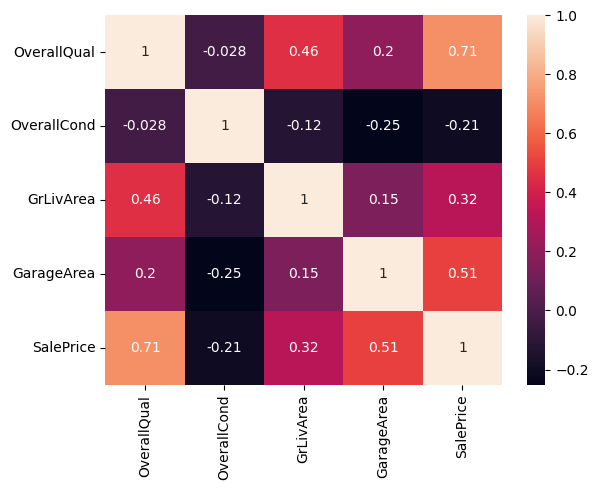

In [241]:
sns.heatmap(corrmatrix, xticklabels=df.columns, 
           yticklabels=df.columns, annot=True)

# chisquare test

In [245]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest

In [246]:
df = spark.read.csv("sample_data.csv", inferSchema=True,
                   header=True)
df.show()

+---+---------+------------+-----+
|age|city_code|country_code|label|
+---+---------+------------+-----+
| 51|       35|          14|    0|
| 49|        3|          14|    0|
| 47|       32|          13|    0|
| 46|       31|          15|    0|
|  5|       36|          14|    0|
| 54|       39|          17|    0|
| 46|       34|          14|    0|
|  5|       34|          15|    0|
| 44|       29|          14|    0|
| 49|       31|          15|    0|
| 54|       37|          15|    0|
| 48|       34|          16|    0|
| 48|        3|          14|    0|
| 43|        3|          11|    0|
| 58|        4|          12|    0|
| 57|       44|          15|    0|
| 54|       39|          13|    0|
| 51|       35|          14|    0|
| 57|       38|          17|    0|
| 51|       38|          15|    0|
+---+---------+------------+-----+
only showing top 20 rows



In [247]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- city_code: integer (nullable = true)
 |-- country_code: integer (nullable = true)
 |-- label: integer (nullable = true)



In [248]:
assembler = VectorAssembler(
    inputCols=['age', 'city_code', 'country_code'],
    outputCol="vector_features")

In [249]:
vectorized_df = assembler.transform(df).select('label', 'vector_features')

In [250]:
vectorized_df.show()

+-----+----------------+
|label| vector_features|
+-----+----------------+
|    0|[51.0,35.0,14.0]|
|    0| [49.0,3.0,14.0]|
|    0|[47.0,32.0,13.0]|
|    0|[46.0,31.0,15.0]|
|    0| [5.0,36.0,14.0]|
|    0|[54.0,39.0,17.0]|
|    0|[46.0,34.0,14.0]|
|    0| [5.0,34.0,15.0]|
|    0|[44.0,29.0,14.0]|
|    0|[49.0,31.0,15.0]|
|    0|[54.0,37.0,15.0]|
|    0|[48.0,34.0,16.0]|
|    0| [48.0,3.0,14.0]|
|    0| [43.0,3.0,11.0]|
|    0| [58.0,4.0,12.0]|
|    0|[57.0,44.0,15.0]|
|    0|[54.0,39.0,13.0]|
|    0|[51.0,35.0,14.0]|
|    0|[57.0,38.0,17.0]|
|    0|[51.0,38.0,15.0]|
+-----+----------------+
only showing top 20 rows



In [251]:
result= ChiSquareTest.test(vectorized_df, "vector_features", "label").head()

In [258]:
result= ChiSquareTest.test(vectorized_df, "vector_features", "label").head()
print("pvalues: " + str(result.pValues))
print("degreesOfFreedom: " + str(result.degreesOfFreedom))
print("test statistics: " + str(result.statistics))

pvalues: [0.05354838241778692,0.007494454436545284,9.393896771570098e-11]
degreesOfFreedom: [34, 22, 42]
test statistics: [48.25357142857143,41.34555444555445,128.85000000000002]


In [257]:
result.asDict()

{'pValues': DenseVector([0.0535, 0.0075, 0.0]),
 'degreesOfFreedom': [34, 22, 42],
 'statistics': DenseVector([48.2536, 41.3456, 128.85])}